In [54]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [55]:
import getdata

d = getdata.data_dict('jv.txt', delim=' ')

In [56]:
data = d.get('data')
header=d.get('headers')

In [57]:
from scipy.optimize import minimize

In [58]:
T = 300
k = 1.38e-23
kT = k*T
q = 1.602e-19

def fun1(x, y, r, rshunt, I0, n):
    value = (x - shockley(x, y, r, rshunt, I0, n))**2
    return value
                

In [59]:
V = data[0][100:]

In [60]:
def shockley(I, V, r, rshunt, I0, n):
    units=1e-12
    value = I0*units*(exp((q*(V-(I*r)))/(n*kT))-1)+(V-(I*r))/10**rshunt
    return value

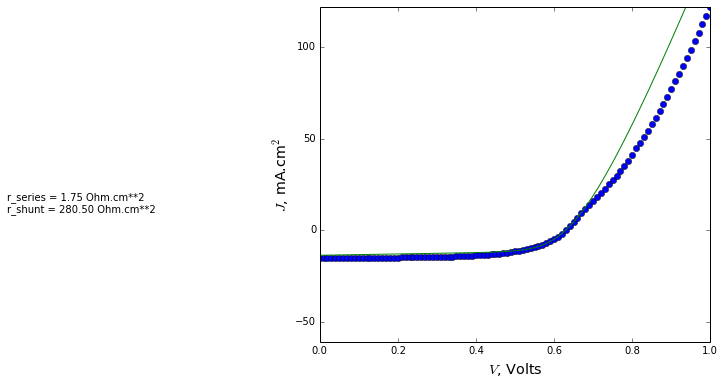

In [61]:
from ipywidgets import *

area = 0.25

def plotJV(r, rshunt, I0, n, JL):
    
    I = []
    for i in range(len(V)):
        res = minimize(fun1, (0), args=(V[i],r,rshunt, I0, n), tol=1e-6, method='nelder-mead')
        I.append(res.x[0])
        
    J = array(I)*1000/area
    fig = figure(figsize=(7,6))
    ax = fig.add_subplot(111)
    ax.plot(V, array(data[1][100:])*1000/area, 'o')
    ax.plot(V, J-JL)
    ax.set_ylabel('$J$, mA.cm$^2$')
    ax.set_xlabel('$V$, Volts')
    ax.set_ylim([-max(array(data[1])*0.5)*1000/area, max(array(data[1])*1000/area)])
    ax.text(-0.8, 10, 'r_series = {0:.2f} Ohm.cm**2\nr_shunt = {1:.2f} Ohm.cm**2'.format(r*area,area*10**rshunt))
    
    
    
r_s = FloatSlider(min=0, max=10, step=0.01, value=0)
rshunt_s = FloatSlider(min=0, max=4, value=4, step=0.01)
rshunt_s.description = 'log(shunt)'
I0_s = FloatSlider(min=1, max=1000, step=10, value=1)
n_s = FloatSlider(min=1, max=3, step=0.1, value = 1.5)
JL_s = FloatSlider(min=0, max=30, step = 0.1, value=0)

interactive(plotJV, r=r_s, rshunt = rshunt_s, I0=I0_s, n=n_s, JL=JL_s)

In [62]:
#want to take slider parameters and fit to data
#also want to get cell parameters 

def Jmod(r, rshunt, I0, n, JL):
    I = []
    for i in range(len(V)):
        res = minimize(fun1, (0), args=(V[i],r,rshunt, I0, n), tol=1e-4, method='nelder-mead')
        I.append(res.x[0])
        
    J = array(I)*1000/area - JL
    return J

In [63]:
J_model = Jmod(r_s.value, rshunt_s.value, I0_s.value, n_s.value, JL_s.value)
len(J_model), len(data[1])
V = data[0]

In [68]:
#p = [r, rshunt, I0, n, JL]

def bigmin(p):
    r = p[0]
    rshunt = p[1]
    I0 = p[2]
    n = p[3]
    JL = p[4]
    
    Jmodel = Jmod(r, rshunt, I0, n, JL)
    value = sum((Jmodel-array(data[1])*1000/area)**2)
    print value
    return value

In [69]:
p  = [r_s.value, rshunt_s.value, I0_s.value, n_s.value, JL_s.value]
bnds = [(0,10), (1, 4), (0, None), (1, 2), (0, 30)]
val = bigmin(p)

15409.6151385


15409.6151385
15409.6151385
4143.34593675
15203.1171562
15481.8636611
186056.897623
14086.7003266
16171.6667257
16171.6667257
4477.98206881
15891.742505
16251.6163634
187118.865247
14863.6408132
15546.9245759
15546.9245759
4203.64472453
15332.1788154
15588.163227
186142.487104
14225.3244751
15403.9675282
15403.9675282
4146.23832411
15228.453617
15516.7425491
186074.549964
14081.6268169
15440.1285554
15440.1285554
4155.91534886
15268.7427758
15537.003571
186088.980766
14117.5804987
15403.5682854
15403.5682854
4148.29628676
15228.0121772
15516.3421269
186075.726029
14081.3329354
15426.203756
15426.203756
4156.80731026
15256.6263513
15537.58598
186084.473762
14103.7520195
15414.007208
15414.007208
4148.15820316
15227.7500493
15516.1043565
186076.424428
14091.3344249
15403.5682854
15403.5682854
4148.29628676
15228.0121772
15516.3421269
186075.726029
14081.3329354
153663.460225
153663.460225
107393.223172
153085.225344
153778.893678
239053.593865
153185.145413
21080.5143669
21080.5143669
68

  status: 2
 success: False
    nfev: 86
     fun: 15414.219984768797
       x: array([   6.980777  ,    3.05024442,  470.98137169,    1.49987136,
         13.70419376])
 message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     jac: array([ -1.12552618e+04,  -1.75558683e+02,   1.12773769e+02,
         1.70672254e+05,  -1.32222892e+03])
     nit: 3

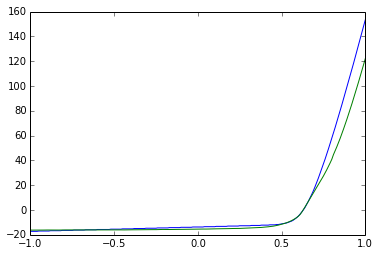

In [73]:
res = minimize(bigmin, p, method='L-BFGS-B', bounds=bnds, options={'eps':1})
plot(V, Jmod(res.x[0], res.x[1], res.x[2], res.x[3], res.x[4]))
plot(V, array(data[1])*1000/area)
res.x
res